In [1]:
%%file custom.css
body {
    font-size: 160%;
    font-family: Lato, Ariel, sans-serif !important;
}

div.slides {
    margin-top: -7%;
}

.left {
    width: 49%;
    float: left;
}

.right {
    width: 49%;
    float: right;
}

.centre {
    text-align: center;
}

h2 {
    text-align: center;
}

div.prompt {
    display: none;
}

div.highlight {
    font-size: 85%; /* This Seems to give an approximate 80char line at 1024 */
}

div.output_html {
    font-size: 85%;
}

div.output_subarea {
    max-width: 100%; !important
}

div.output_png {
    text-align: center;
}

li {
    padding-top: 1em !important;
}

ul.logos {
    margin: 0px;
    padding: 0px;
    width: 100%;
}

ul.logos li {
    list-style: none;
    height:150px;

}

Overwriting custom.css


In [6]:
from mayavi import mlab

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
import sunpy.map

%matplotlib inline

font_size = 20
pgf_with_latex = {
    "font.size": font_size,
    "axes.labelsize": font_size,  # LaTeX default is 10pt font.
    "legend.fontsize":font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    }

matplotlib.rcParams.update(pgf_with_latex)

# Simulations of Magnetohydrodynamic Waves Driven by Photospheric Motions

Stuart J. Mumford

Supervisor: Robertus Erdélyi

Solar Physics & Space Plasma Research Centre (SP2RC), School of Mathematics and Statistics, The University of Sheffield

<img style='float: right; width: 30%; margin-top: 90px;' src='images/TUOS_Logo_CMYK_Keyline.svg'/> 
<img style='float: right; width: 30%; margin-top: 60px; margin-right: 110px;' src='images/swat_logo.svg'/> 
<img style='float: left; width: 25%;' src='images/SP2RC_v6_plain.svg'/>

# My Publications

<b>Mumford, S. J.</b> and  Erdélyi, R. - Monthly Noticies of the Royal Astronomical Society - March 2015 - Volume 449 Issue 2. <br />
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2015arXiv150101871M/" target="blank_"> Photospheric Logarithmic Velocity Spirals as MHD Wave Generation Mechanisms</a>


<b>Mumford, S. J.</b>, Fedun, V., Erdélyi, R. - The Astrophysical Journal -  January 2015 - Volume 799, Issue 1 <br/>
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2013arXiv1305.7415M/"
target="blank_" class="papertitle">Generation of Magnetohydrodynamic Waves in Low Solar
 Atmospheric Flux Tubes by Photospheric Motions</a>
 

The SunPy Community, <b>Mumford, S. J.</b>, Christe, S., Pérez-Suárez, D., et. al - Computational Science and Discovery - January 2015 - Volume 8 Issue 1.<br/>
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2015CS%26D....8a4009S/" target="blank_">SunPy: Python for Solar Physics</a>


Freij N., Scullion E. M., Nelson C. J., <b>Mumford S. J.</b>, Wedemeyer S., and Erdélyi R. - The Astrophysical Journal - July 2014 - Volume 791, Issue 1, p.61 <br />
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2014ApJ...791...61F/" target="_blank">The Detection of Upwardly Propagating Waves Channeling Energy from the Chromosphere to the Low Corona</a>


Gent, F. A., Fedun, V., <b>Mumford, S. J.</b>, Erdélyi, R. - Monthly Notices of the Royal Astronomical Society - October 2013 - Volume 435, Issue 1, p.689-697 <br />
<a href="http://labs.adsabs.harvard.edu/ui/abs/2013MNRAS.435..689G" target="_blank">Magnetohydrostatic equilibrium - I. Three-dimensional open magnetic flux tube in the stratified solar atmosphere</a>

Nelson, C. J., Doyle, J. G., Erdélyi, R., Huang, Z., Madjarska, M. S., Mathioudakis, M., <b>Mumford, S. J.</b>, Reardon, K - Solar Physics - April 2013 - Volume 283, Issue 2, p.307-323. <br />
<a href="http://labs.adsabs.harvard.edu/ui/abs/2013SoPh..283..307N"
target="_blank" class="papertitle">Statistical Analysis of Small Ellerman Bomb Events</a>


# Problem - Coronal Heating
<br />

<div class='left'>

<p>
The solar atmosphere is too hot when compared to known energy input.

What are the unknown heating mechanisms?
</p>

<ul>
<li>
Magnetic Reconnection
</li>
<li>
Magnetohydrodynamic (MHD) Waves
</li>
</ul>
</div>

<div class='right'>

<img width=100% src="./images/f_211_193_171pfss_2048.jpg"/>

</div>

# MHD Waves


- Waves generated in high-energy low atmosphere.
- Wave propagate radially, along magnetic field lines.
- Waves deposit energy higher in the atmosphere.

The mechanism by which the wave energy is converted into atmospheric heating in the high atmosphere is unknown, but the properties of the wave behavior is dependant on the wave mode.

# Exciting Waves in the Photosphere

In [3]:
x_range, y_range = [-300, 300]*u.arcsec, [-250, 250]*u.arcsec

plt.ioff()
fig = plt.figure(dpi=50, figsize=(11,8))
mm = sunpy.map.Map('./gband_data/Gband_cospatial_cotemporal_00000.fits').submap(x_range, y_range)
mm = mm.submap([-440,440]*u.arcsec, [-440,440]*u.arcsec)
mm.plot_settings['cmap'] = 'gray'
mm.plot_settings['title'] = ''
im = mm.plot()
fig.savefig('./images/gband-plot.png', transparent=True)

<div class='left'>

<p>
Dynamic photosphere with embedded magnetic field provides many potential ways of driving MHD waves.
</p>
<ul>
<li>
'Buffeting'
</li>
<li>
Convective motions (vertically).
</li>
<li>
Spiralling in downdrafts.
</li>
</ul>

</div>

<div class='right'>

<img width=100% src="./images/gband-plot.png"/>

</div>

# The Code

The code used is the Sheffield Advanced Code (SAC) <cite data-cite="1226750/9AMFKPUF"></cite>(Shelyag, Fedun, and Erdélyi 2008). 

SAC simulates purtabations on a static background, using a CD4 solver with hyper-diffusion and hyper-viscosity terms to stabalise the solution.

This makes it well suited to solving wave pertubations on top of a highly stratified bacground such as the solar atmosphere.

# The Model

To simulate wave excitation in the photosphere a numerical model of the solar atmosphere is needed.

Hydrostatic background from the VAL 3C model <cite data-cite="1226750/45U23R6J"></cite>(Vernazza, Avrett, and Loeser 1981):

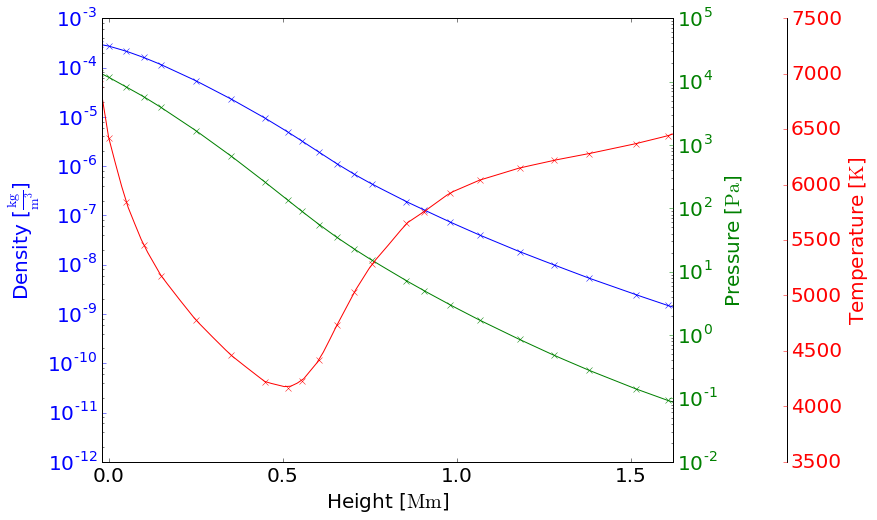

In [9]:
import pysac.mhs_atmosphere as atm

#Read in the VAL3C model
empirical_data = atm.hs_atmosphere.read_VAL3c_MTW(MTW_file=False)


# Create a Z array at the interpolated resolution and interpolate.
ZZ = u.Quantity(np.linspace(empirical_data['Z'][0], empirical_data['Z'][-1], 128), unit=empirical_data['Z'].unit)
table = atm.hs_atmosphere.interpolate_atmosphere(empirical_data, ZZ, s=0)


# Create a figure and make space for the axes.
fig, ax = plt.subplots(gridspec_kw={'right':0.77, 'left':0.16, 'bottom':0.13}, figsize=(13,8))

# Shortcut all the Mm conversion.
Z = empirical_data['Z'].to(u.Mm)

lrho, = ax.plot(Z, empirical_data['rho'].quantity.si, 'x', color='blue')
lrho_i, = ax.plot(ZZ.to(u.Mm), table['rho'].quantity.si, color='blue')

ax2 = ax.twinx()
lp, = ax2.plot(Z, empirical_data['p'].to(u.Pa), 'x', color='green')
lp_i, = ax2.plot(ZZ.to(u.Mm), table['p'].to(u.Pa), color='green')


ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
lt, = ax3.plot(Z, empirical_data['T'].to(u.K), 'x', color='red')
lt_i, = ax3.plot(ZZ.to(u.Mm), table['T'].to(u.K), color='red')


# Set primary axes properties and labels
ax.semilogy()
ax.set_ylabel(r"Density [{}]".format(lrho._yorig.unit._repr_latex_()))
ax.set_xlabel(r"Height [{}]".format(lrho._xorig.unit._repr_latex_()))
ax.set_xlim(Z[0].value-0.1, Z[-1].value+0.1)


# Pressure Axis
ax2.semilogy()
ax2.set_ylabel(r"Pressure [{}]".format(lp._yorig.unit._repr_latex_()))


# Temp axis
ax3.set_ylabel(r"Temperature [{}]".format(lt._yorig.unit._repr_latex_()))

ax.set_xlim([-0.02,1.62])
ax3.set_ylim([3500,7500])
# Set the colours for the ticks and the labels.
ax.tick_params(axis='y', colors=lrho.get_color())
ax2.tick_params(axis='y', colors=lp.get_color())
ax3.tick_params(axis='y', colors=lt.get_color())

ax.yaxis.label.set_color(lrho.get_color())
ax2.yaxis.label.set_color(lp.get_color())
ax3.yaxis.label.set_color(lt.get_color())

# Magnetic Flux Tube

The magnetic field model follows <cite data-cite="1226750/4CKVZT29"></cite>(Gent et al. 2013) and is constructed as a self-similar, cylindrically symmetric, expanding field.

# Identifying Waves from Broadband Drivers

Photospheric drivers excite multiple wave modes simulatenously.

How to quantify the relative strengths of the different modes from different drivers.

# Bibliography


<div class="cite2c-biblio"></div>